In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the XML file
import xml.etree.ElementTree as ET

# Path to your XML file
xml_file_path = "export.xml"

# Parse the XML file
tree = ET.parse(xml_file_path)
root = tree.getroot()

# Initialize lists to store extracted data
step_counts = []
flights_climbed = []
calories_burned = []

# Parse XML for specific health metrics
for record in root.findall("Record"):
    record_type = record.attrib.get("type")
    value = float(record.attrib.get("value", 0))
    start_date = record.attrib.get("startDate", "").split(" ")[0]  # Extract only the date part
    
    # Extract relevant health data
    if record_type == "HKQuantityTypeIdentifierStepCount":
        step_counts.append((start_date, value))
    elif record_type == "HKQuantityTypeIdentifierFlightsClimbed":
        flights_climbed.append((start_date, value))
    elif record_type == "HKQuantityTypeIdentifierActiveEnergyBurned":
        calories_burned.append((start_date, value))

# Convert extracted data to DataFrames
steps_df = pd.DataFrame(step_counts, columns=["Date", "Steps"]).groupby("Date").sum().reset_index()
flights_df = pd.DataFrame(flights_climbed, columns=["Date", "FlightsClimbed"]).groupby("Date").sum().reset_index()
calories_df = pd.DataFrame(calories_burned, columns=["Date", "CaloriesBurned"]).groupby("Date").sum().reset_index()

# Merge all DataFrames into a single table
merged_df = steps_df.merge(flights_df, on="Date", how="outer").merge(calories_df, on="Date", how="outer").fillna(0)

# Display the first few rows
merged_df.head()


,Date,Steps,FlightsClimbed,CaloriesBurned
0,2024-01-01,1431.0,0.0,32.465
1,2024-01-02,3607.0,5.0,113.584
2,2024-01-03,4655.0,4.0,161.259
3,2024-01-04,3041.0,4.0,94.490
4,2024-01-05,5927.0,7.0,217.846


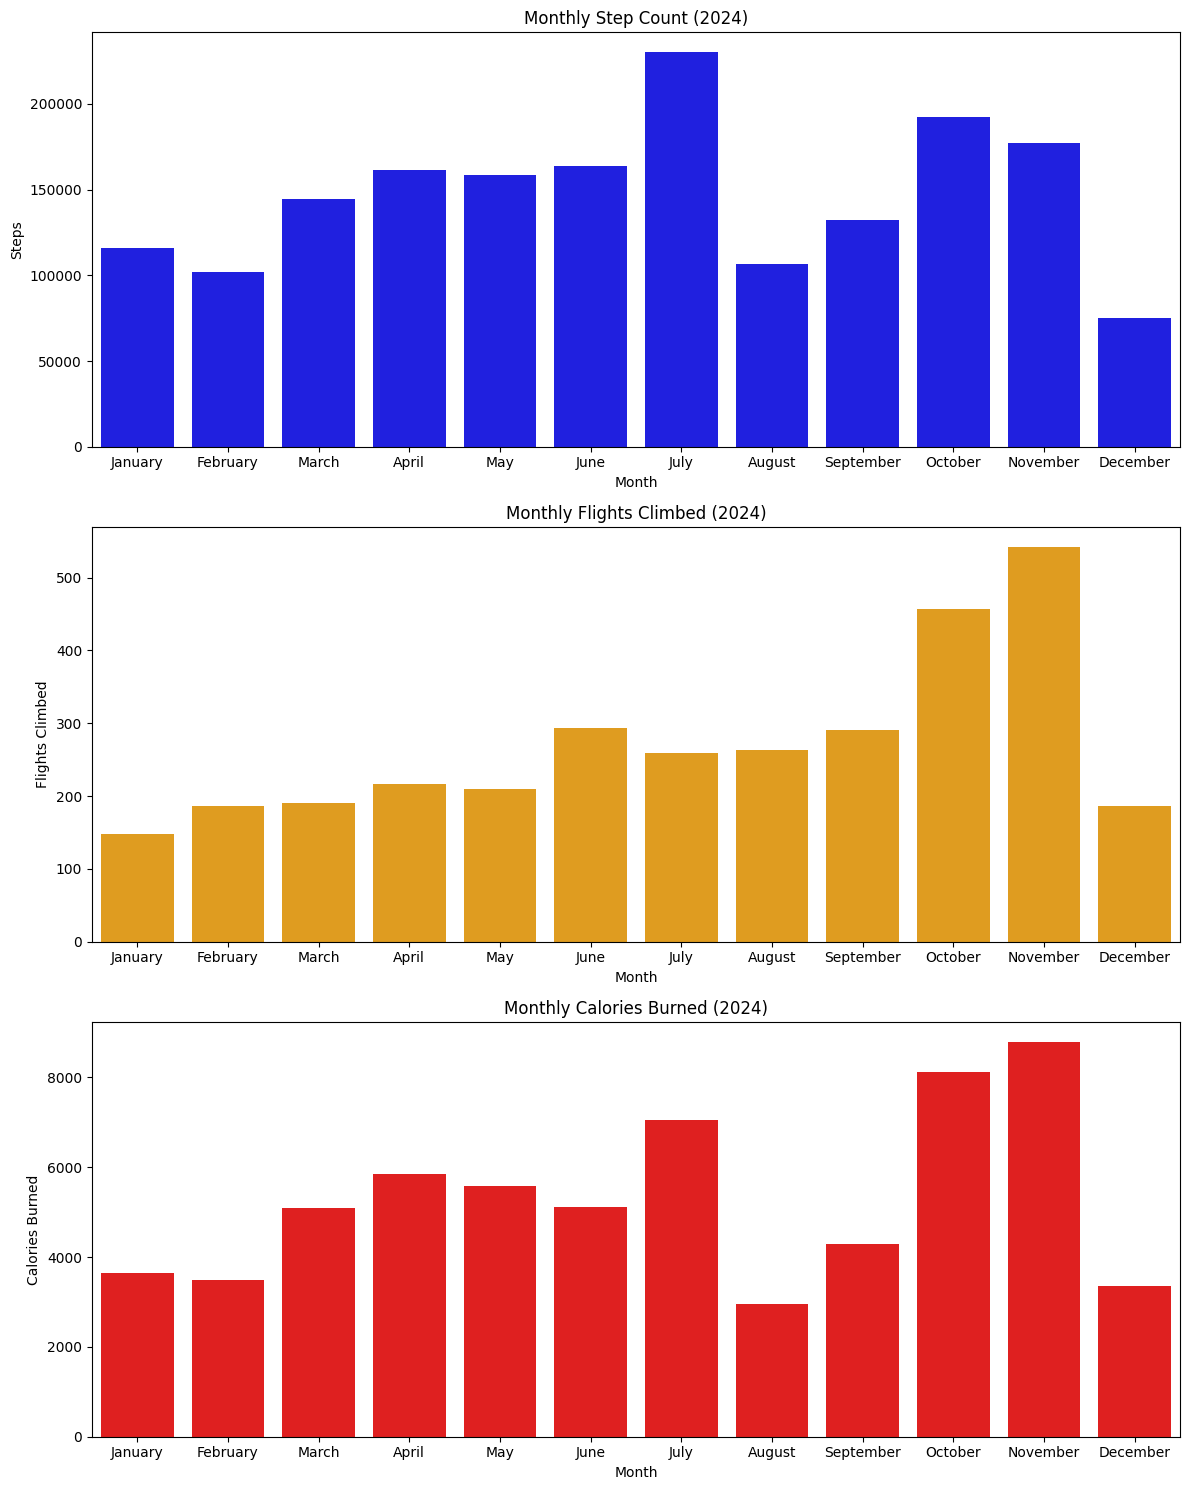

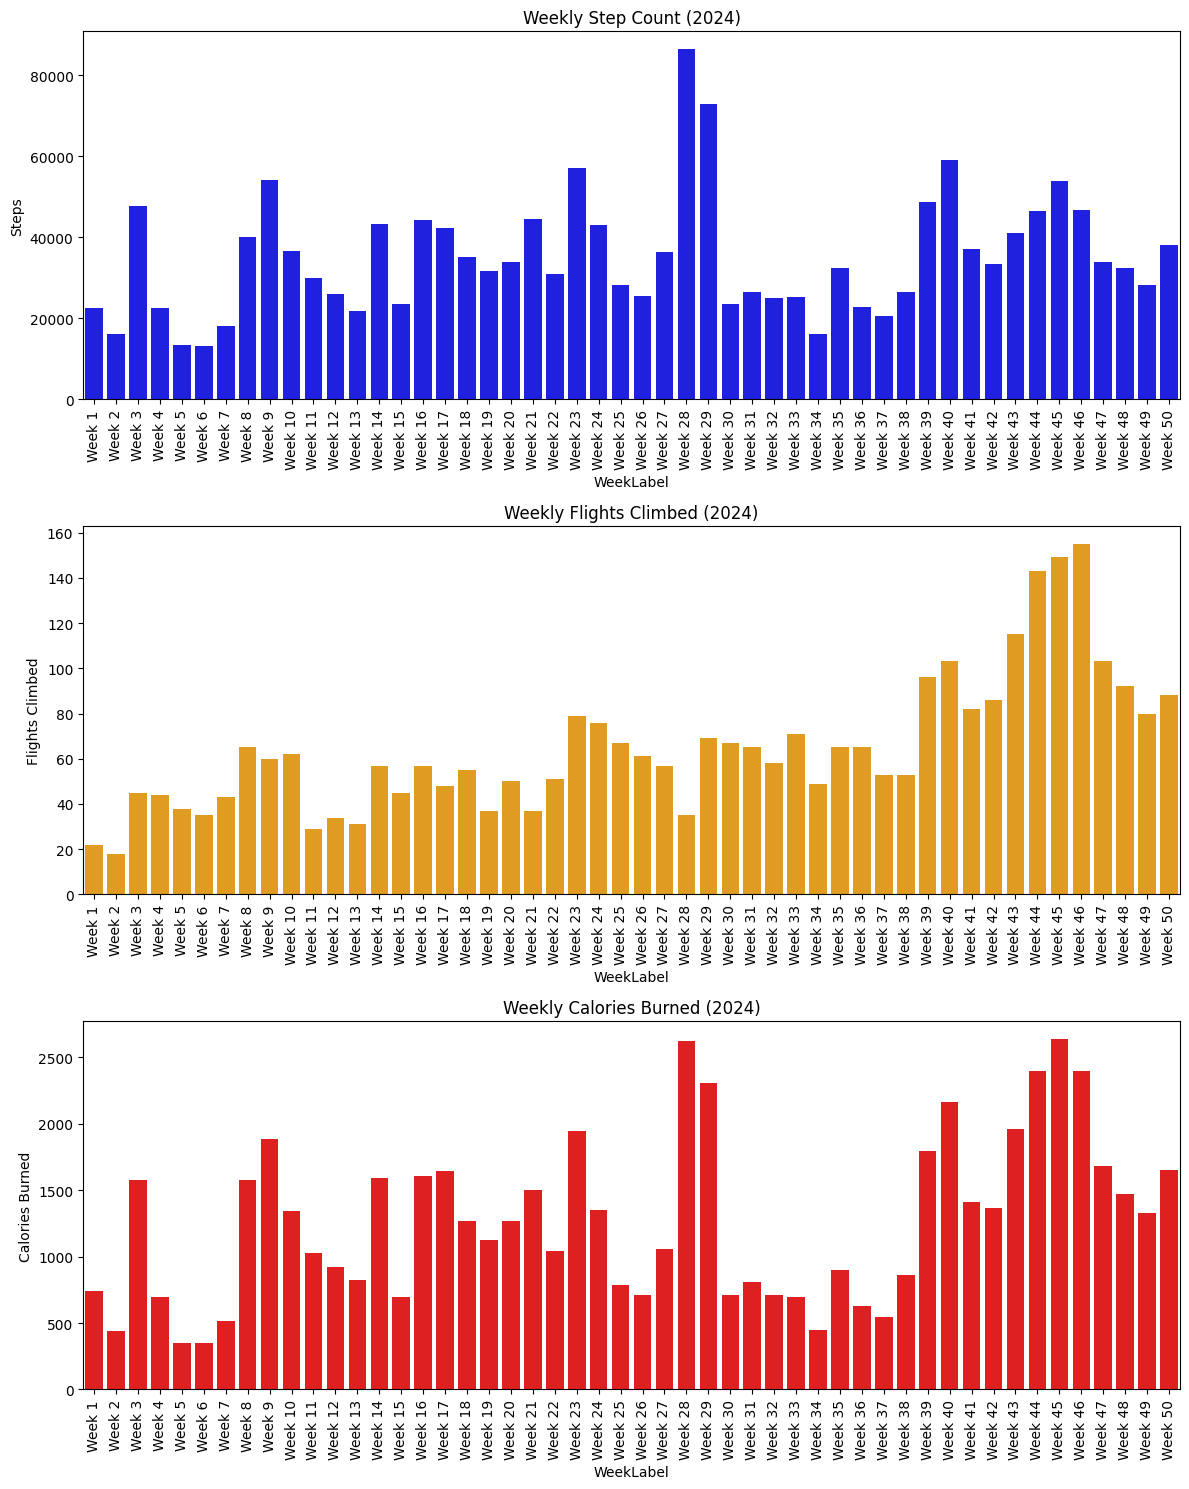

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert "Date" column to datetime
merged_df["Date"] = pd.to_datetime(merged_df["Date"])

# Filter data for the specific date range (01.01.2024 to 16.12.2024)
filtered_df = merged_df[(merged_df["Date"] >= "2024-01-01") & (merged_df["Date"] <= "2024-12-16")]

# ---------- Monthly Aggregation with Month Names ----------
filtered_df["Month"] = filtered_df["Date"].dt.strftime("%B")  # Month names like January, February
monthly_summary = filtered_df.groupby("Month")[["Steps", "FlightsClimbed", "CaloriesBurned"]].sum().reset_index()

# Sort months in calendar order
months_order = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]
monthly_summary["Month"] = pd.Categorical(monthly_summary["Month"], categories=months_order, ordered=True)
monthly_summary = monthly_summary.sort_values("Month")

# Plot Monthly Data
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

sns.barplot(data=monthly_summary, x="Month", y="Steps", ax=axes[0], color="blue")
axes[0].set_title("Monthly Step Count (2024)")
axes[0].set_ylabel("Steps")

sns.barplot(data=monthly_summary, x="Month", y="FlightsClimbed", ax=axes[1], color="orange")
axes[1].set_title("Monthly Flights Climbed (2024)")
axes[1].set_ylabel("Flights Climbed")

sns.barplot(data=monthly_summary, x="Month", y="CaloriesBurned", ax=axes[2], color="red")
axes[2].set_title("Monthly Calories Burned (2024)")
axes[2].set_ylabel("Calories Burned")

plt.tight_layout()
plt.show()

# ---------- Weekly Aggregation with Week Labels ----------
filtered_df["Week"] = ((filtered_df["Date"] - filtered_df["Date"].min()).dt.days // 7) + 1
weekly_summary = filtered_df.groupby("Week")[["Steps", "FlightsClimbed", "CaloriesBurned"]].sum().reset_index()

# Rename weeks as "Week 1", "Week 2", etc.
weekly_summary["WeekLabel"] = "Week " + weekly_summary["Week"].astype(str)

# Plot Weekly Data
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

sns.barplot(data=weekly_summary, x="WeekLabel", y="Steps", ax=axes[0], color="blue")
axes[0].set_title("Weekly Step Count (2024)")
axes[0].set_ylabel("Steps")
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(data=weekly_summary, x="WeekLabel", y="FlightsClimbed", ax=axes[1], color="orange")
axes[1].set_title("Weekly Flights Climbed (2024)")
axes[1].set_ylabel("Flights Climbed")
axes[1].tick_params(axis='x', rotation=90)

sns.barplot(data=weekly_summary, x="WeekLabel", y="CaloriesBurned", ax=axes[2], color="red")
axes[2].set_title("Weekly Calories Burned (2024)")
axes[2].set_ylabel("Calories Burned")
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


C:\Users\utkuc\AppData\Local\Temp\ipykernel_32004\3039785669.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["WeekStart"] = filtered_df["Date"] - pd.to_timedelta(filtered_df["Date"].dt.weekday, unit="D")
C:\Users\utkuc\AppData\Local\Temp\ipykernel_32004\3039785669.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["DayOfWeek"] = filtered_df["Date"].dt.day_name()
C:\Users\utkuc\AppData\Local\Temp\ipykernel_32004\3039785669.py:39: FutureWarning: 

Passing `palette` without assig

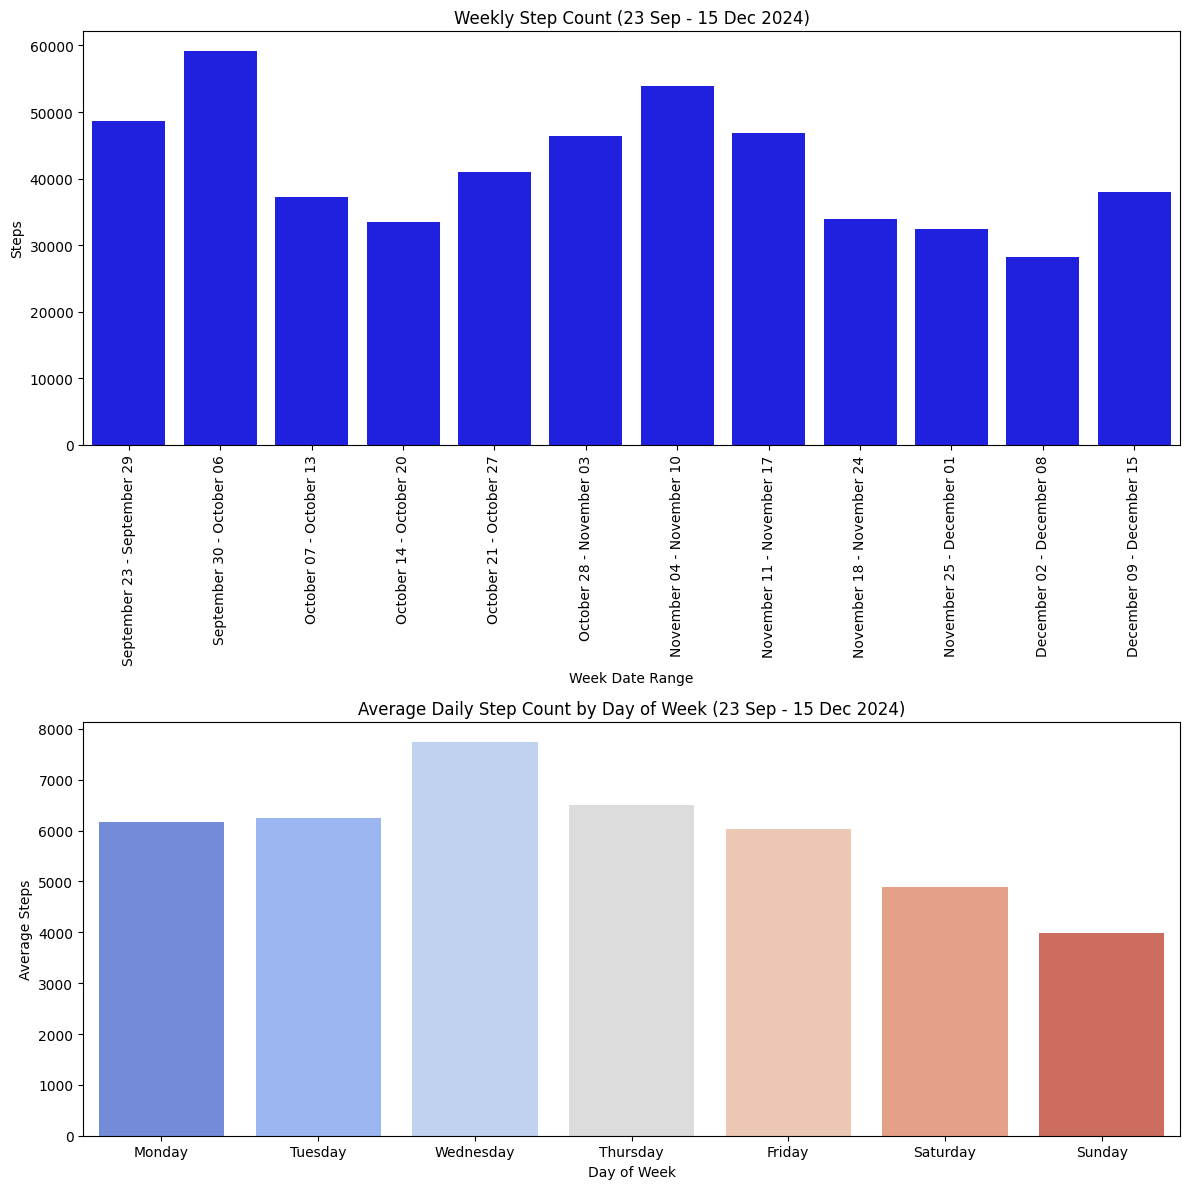

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the specific date range: 23rd September to 15th December 2024
filtered_df = merged_df[
    (merged_df["Date"] >= "2024-09-23") & (merged_df["Date"] <= "2024-12-15")
]

# ---------- Weekly Aggregation ----------
filtered_df["WeekStart"] = filtered_df["Date"] - pd.to_timedelta(filtered_df["Date"].dt.weekday, unit="D")
weekly_summary = filtered_df.groupby("WeekStart")[["Steps", "FlightsClimbed", "CaloriesBurned"]].sum().reset_index()

# Add Week Labels as Date Ranges
weekly_summary["WeekLabel"] = weekly_summary["WeekStart"].dt.strftime("%B %d") + " - " + (
    weekly_summary["WeekStart"] + pd.Timedelta(days=6)
).dt.strftime("%B %d")

# ---------- Day-of-Week Aggregation ----------
filtered_df["DayOfWeek"] = filtered_df["Date"].dt.day_name()
day_of_week_summary = (
    filtered_df.groupby("DayOfWeek")[["Steps", "FlightsClimbed", "CaloriesBurned"]]
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    .reset_index()
)

# ---------- Plot Weekly Data ----------
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Weekly Data Bar Plot
sns.barplot(data=weekly_summary, x="WeekLabel", y="Steps", ax=axes[0], color="blue")
axes[0].set_title("Weekly Step Count (23 Sep - 15 Dec 2024)")
axes[0].set_ylabel("Steps")
axes[0].set_xlabel("Week Date Range")
axes[0].tick_params(axis="x", rotation=90)

# ---------- Plot Day-of-Week Data ----------
sns.barplot(data=day_of_week_summary, x="DayOfWeek", y="Steps", ax=axes[1], palette="coolwarm")
axes[1].set_title("Average Daily Step Count by Day of Week (23 Sep - 15 Dec 2024)")
axes[1].set_ylabel("Average Steps")
axes[1].set_xlabel("Day of Week")

plt.tight_layout()
plt.show()


C:\Users\utkuc\AppData\Local\Temp\ipykernel_32004\864303726.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["DayOfWeek"] = filtered_df["Date"].dt.day_name()
C:\Users\utkuc\AppData\Local\Temp\ipykernel_32004\864303726.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["WeekendFlag"] = filtered_df["DayOfWeek"].isin(["Friday", "Saturday", "Sunday"])


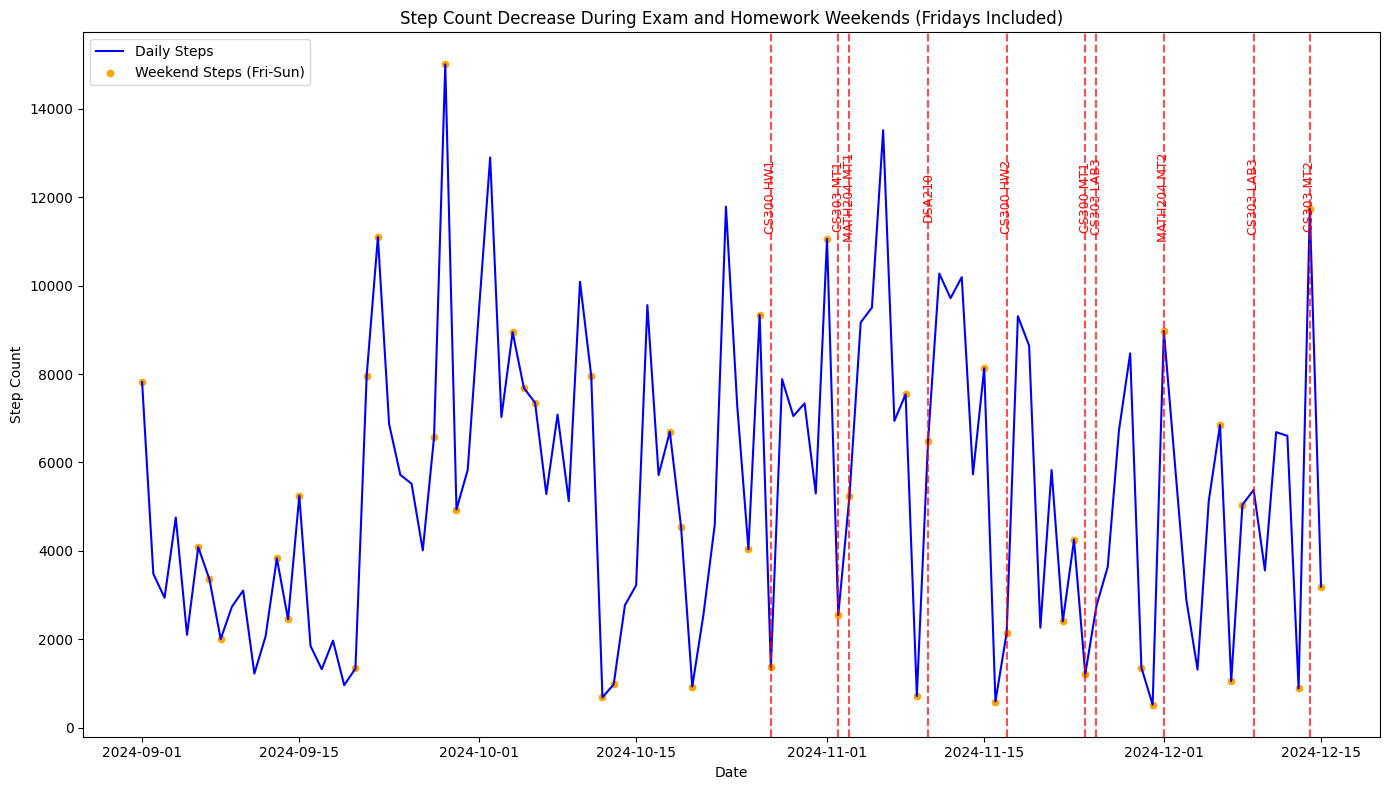

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assignments and Exams Data
events = [
    {"name": "CS300 HW1", "date": "2024-10-27"},
    {"name": "CS303 MT1", "date": "2024-11-02"},
    {"name": "MATH204 MT1", "date": "2024-11-03"},
    {"name": "DSA210", "date": "2024-11-10"},
    {"name": "CS300 HW2", "date": "2024-11-17"},
    {"name": "CS300 MT1", "date": "2024-11-24"},
    {"name": "CS303 LAB3", "date": "2024-11-25"},
    {"name": "MATH204 MT2", "date": "2024-12-01"},
    {"name": "CS303 LAB3", "date": "2024-12-09"},
    {"name": "CS303 MT2", "date": "2024-12-14"},
]

# Convert merged_df date column to datetime
merged_df["Date"] = pd.to_datetime(merged_df["Date"])

# Filter data for September to December 2024
filtered_df = merged_df[(merged_df["Date"] >= "2024-09-01") & (merged_df["Date"] <= "2024-12-31")]

# Add a column for the day of the week
filtered_df["DayOfWeek"] = filtered_df["Date"].dt.day_name()

# Filter weekends (Friday to Sunday)
filtered_df["WeekendFlag"] = filtered_df["DayOfWeek"].isin(["Friday", "Saturday", "Sunday"])

# Plot step count for weekends and annotate events
plt.figure(figsize=(14, 8))

# Highlight step count on weekends
sns.lineplot(data=filtered_df, x="Date", y="Steps", label="Daily Steps", color="blue")
sns.scatterplot(
    data=filtered_df[filtered_df["WeekendFlag"]],
    x="Date",
    y="Steps",
    color="orange",
    label="Weekend Steps (Fri-Sun)"
)

# Annotate academic events
for event in events:
    event_date = pd.to_datetime(event["date"])
    if event_date in filtered_df["Date"].values:
        plt.axvline(event_date, color="red", linestyle="--", alpha=0.7)
        plt.text(event_date, filtered_df["Steps"].max() * 0.8, event["name"],
                 rotation=90, color="red", fontsize=9, ha="center", va="center")

# Add labels and title
plt.title("Step Count Decrease During Exam and Homework Weekends (Fridays Included)")
plt.xlabel("Date")
plt.ylabel("Step Count")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\utkuc\AppData\Local\Temp\ipykernel_17592\3531150091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Week"] = filtered_df["Date"].dt.to_period("W").apply(lambda r: r.start_time)


ConversionError: Failed to convert value(s) to axis units: Timestamp('2024-10-21 00:00:00')

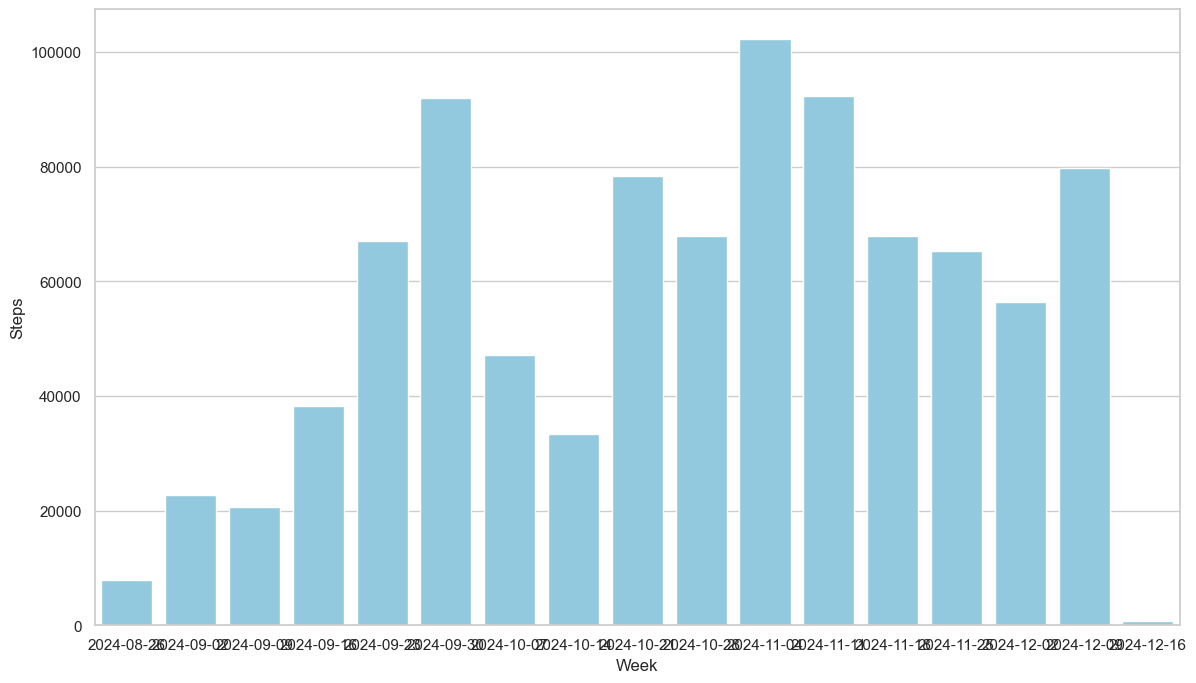

In [21]:
# Aggregate step counts weekly
filtered_df["Week"] = filtered_df["Date"].dt.to_period("W").apply(lambda r: r.start_time)
weekly_summary = filtered_df.groupby("Week")["Steps"].sum().reset_index()

# Mark weeks with events
event_weeks = [pd.to_datetime(event["date"]).to_period("W").start_time for event in events]

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=weekly_summary, x="Week", y="Steps", color="skyblue")

# Highlight event weeks
for event_week in event_weeks:
    plt.axvline(event_week, color="red", linestyle="--", alpha=0.7)
    plt.text(event_week, weekly_summary["Steps"].max() * 0.9, "Event Week", 
             rotation=90, color="red", fontsize=8, ha="center")

plt.title("Weekly Step Count with Exam/Assignment Weeks Highlighted")
plt.xlabel("Week Start Date")
plt.ylabel("Total Steps")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\utkuc\AppData\Local\Temp\ipykernel_32004\1781504986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["DayType"] = filtered_df["DayOfWeek"].apply(lambda x: "Weekend (Fri-Sun)" if x in ["Friday", "Saturday", "Sunday"] else "Weekday")
C:\Users\utkuc\AppData\Local\Temp\ipykernel_32004\1781504986.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x="DayType", y="Steps", palette="pastel")


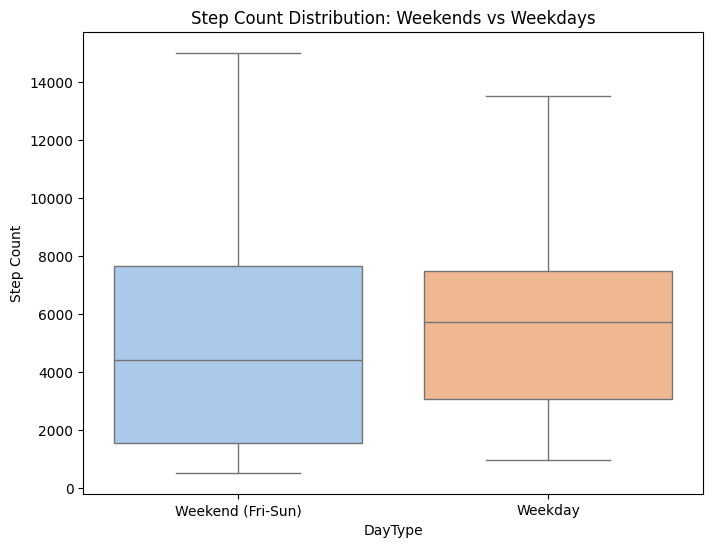

In [11]:
# Label days as 'Weekend' or 'Weekday'
filtered_df["DayType"] = filtered_df["DayOfWeek"].apply(lambda x: "Weekend (Fri-Sun)" if x in ["Friday", "Saturday", "Sunday"] else "Weekday")

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_df, x="DayType", y="Steps", palette="pastel")
plt.title("Step Count Distribution: Weekends vs Weekdays")
plt.ylabel("Step Count")
plt.show()


C:\Users\utkuc\AppData\Local\Temp\ipykernel_32004\3285928149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Week"] = filtered_df["Date"].dt.to_period("W").apply(lambda r: r.start_time)


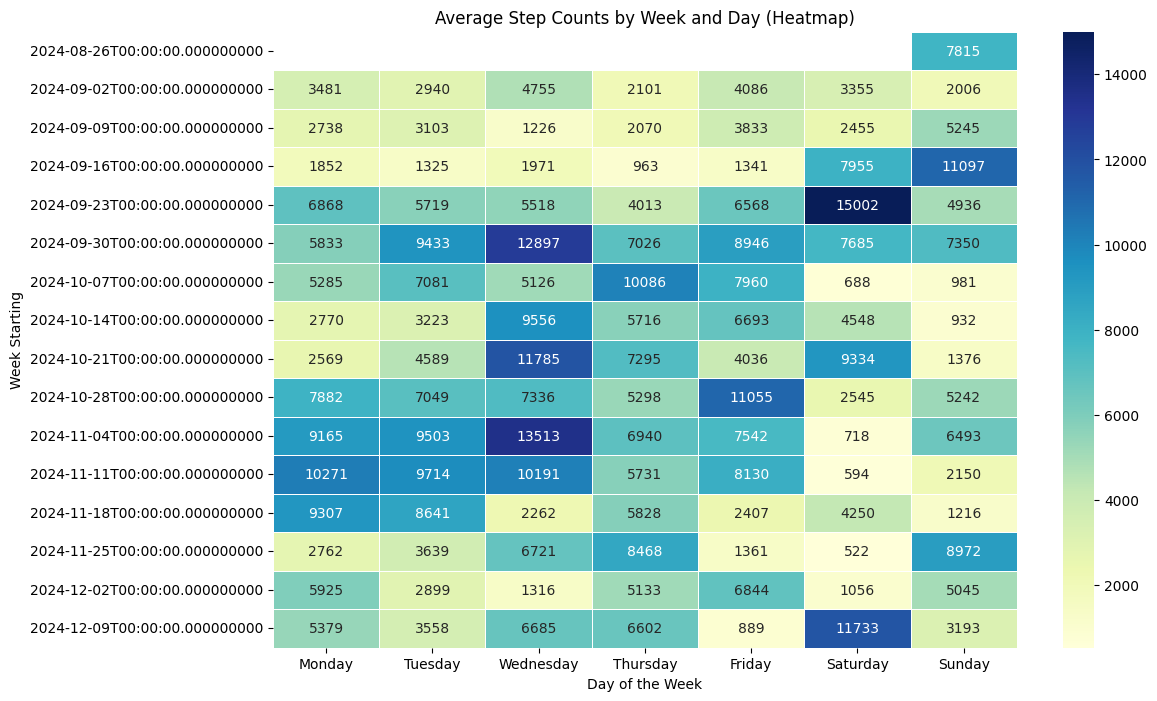

In [12]:
# Prepare data for heatmap
filtered_df["Week"] = filtered_df["Date"].dt.to_period("W").apply(lambda r: r.start_time)
pivot_table = filtered_df.pivot_table(index="Week", columns="DayOfWeek", values="Steps", aggfunc="mean")
pivot_table = pivot_table[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Average Step Counts by Week and Day (Heatmap)")
plt.xlabel("Day of the Week")
plt.ylabel("Week Starting")
plt.show()
